<a href="https://colab.research.google.com/github/saurabhforgoogle/Mask-Detector/blob/main/MaskClassifyUsingCascades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import xml.etree.ElementTree as ET
import tensorflow as tf  
import os  
import numpy as np  
import cv2  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D,Activation
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from tensorflow.keras.utils import to_categorical

# **Since I Have Changed Images to numpy array of 40*40*3 size Earlier ,Hence directly loading It**

In [ ]:
path='/content/drive/MyDrive/Datasets/Mask Images'
X=np.load(os.path.join(path,'ImagesArray.npy'))
Y=np.load(os.path.join(path,'ImageLabelsArray.npy'))

'with_mask'

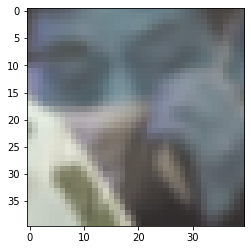

In [ ]:
i=10
plt.imshow(X[i])
Y[i]

In [ ]:
X.shape

(2936, 40, 40, 3)

In [ ]:
Y.shape

(2936,)

In [ ]:
np.unique(Y)

array(['mask_weared_incorrect', 'with_mask', 'without_mask'], dtype='<U32')

In [ ]:
Y_encoded= label_encoder.fit_transform(Y)
y = to_categorical(Y_encoded, 3)

In [ ]:
y.shape

(2936, 3)

In [ ]:
X=X.reshape(-1,40,40,3)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),padding='same',input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(3))
model.add(Activation('softmax'))


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X,y,batch_size=32,validation_split=0.1,epochs=10)

Epoch 1/10
83/83 [==============================] - 2s 12ms/step - loss: 0.3412 - accuracy: 0.8823 - val_loss: 0.1756 - val_accuracy: 0.9388
Epoch 2/10
83/83 [==============================] - 1s 10ms/step - loss: 0.1998 - accuracy: 0.9364 - val_loss: 0.1831 - val_accuracy: 0.9252
Epoch 3/10
83/83 [==============================] - 1s 10ms/step - loss: 0.1846 - accuracy: 0.9372 - val_loss: 0.2497 - val_accuracy: 0.9048
Epoch 4/10
83/83 [==============================] - 1s 10ms/step - loss: 0.1453 - accuracy: 0.9508 - val_loss: 0.1857 - val_accuracy: 0.9218
Epoch 5/10
83/83 [==============================] - 1s 10ms/step - loss: 0.1348 - accuracy: 0.9550 - val_loss: 0.1653 - val_accuracy: 0.9320
Epoch 6/10
83/83 [==============================] - 1s 9ms/step - loss: 0.1138 - accuracy: 0.9599 - val_loss: 0.1645 - val_accuracy: 0.9252
Epoch 7/10
83/83 [==============================] - 1s 10ms/step - loss: 0.1095 - accuracy: 0.9584 - val_loss: 0.1761 - val_accuracy: 0.9354
Epoch 8/10
83/

In [ ]:
model.save(os.path.join(path,'maskclassifiermodel.h5'))

In [ ]:
test=cv2.imread('/content/drive/MyDrive/Datasets/Mask Images/testimages/p1.jpg')
test=cv2.resize(test,(40,40))
test=test/255.0
test=test.reshape(1,40,40,3)
Pred_test=model.predict([test])[0]
Pred_test

array([0.00117957, 0.9939091 , 0.00491122], dtype=float32)

In [ ]:
label_encoder.inverse_transform([ np.where(Pred_test==max(Pred_test))[0][0]])[0]       

'with_mask'

In [ ]:
from tensorflow import keras
model = keras.models.load_model(os.path.join(path,'maskclassifiermodel.h5'))

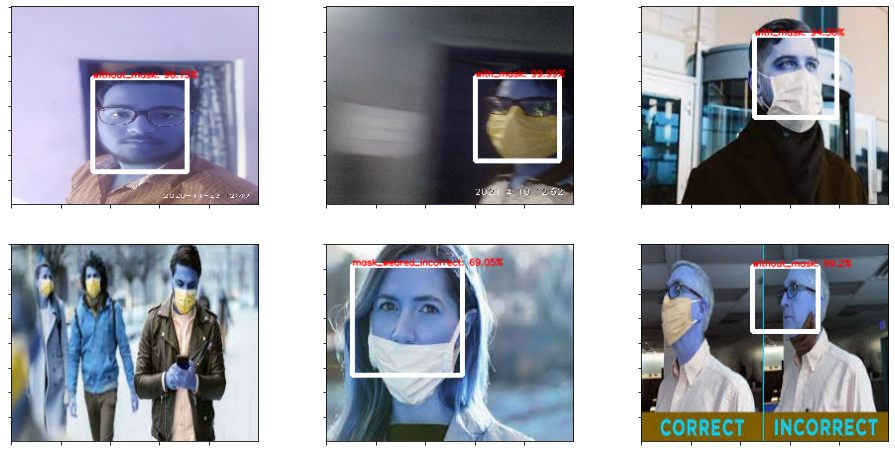

In [ ]:
face_cascade = cv2.CascadeClassifier(os.path.join(path,'haarcascade_frontalface_default.xml'))
fig, ax=plt.subplots(nrows=2,ncols=3,figsize=(16,8))
TestImagesPath=os.path.join(path,'testimages')
TestImages=os.listdir(TestImagesPath)
index=0
for axes in ax:
    for axis in axes:
        image=cv2.imread(os.path.join(TestImagesPath,TestImages[index]))
        image=cv2.resize(image,(250,200))
        face_rect = face_cascade.detectMultiScale(image,
                                              scaleFactor = 1.2,
                                              minNeighbors = 5)
        for (x, y, w, h) in face_rect:
            faceImage=image[y:y+h, x:x+w,:]
            faceImage=cv2.resize(faceImage,(40,40))
            faceImage=faceImage/255.0
            faceImage=faceImage.reshape(1,40,40,3)
            PredictfaceImage=model.predict([faceImage])[0]
            Predictedlabel=label_encoder.inverse_transform([np.where(PredictfaceImage==max(PredictfaceImage))[0][0]])[0] 
            PredictedlabelChance=round(max(PredictfaceImage)*100,2)
            
            image=cv2.rectangle(image, (x, y),
                      (x + w, y + h), (255, 255, 255), 3)
            text='{}: {}%'.format(Predictedlabel,PredictedlabelChance)
            image = cv2.putText(image, text, (x,y),  cv2.FONT_HERSHEY_SIMPLEX, 
                   0.4, (255, 0, 0), 1, cv2.LINE_AA)
        axis.imshow(image)
        axis.set(xticklabels=[]) 
        axis.set(yticklabels=[]) 
        index+=1

plt.show()